In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df=pd.read_excel("customer data.xlsx")
df

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Annual Income (k$)      200 non-null    int64
 1   Spending Score (1-100)  200 non-null    int64
dtypes: int64(2)
memory usage: 3.3 KB


In [4]:
df.isnull().sum()

Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

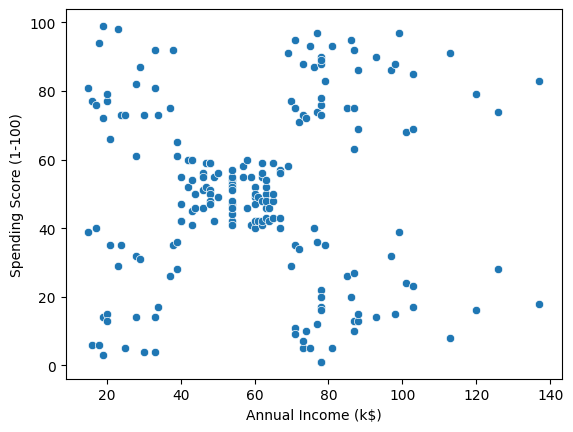

In [5]:
sns.scatterplot(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'])
plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df_scale=ss.fit_transform(df)

In [7]:
from sklearn.cluster import KMeans

In [8]:
import warnings
warnings.filterwarnings('ignore')
wcss=[]
for i in range(2,11):
    km=KMeans(n_clusters=5)
    km.fit(df_scale)
    #wcss
    wcss.append(km.inertia_)
wcss

[65.56840815571681,
 65.56840815571681,
 65.56840815571681,
 65.56840815571681,
 65.56840815571681,
 65.56840815571681,
 65.56840815571681,
 65.56840815571681,
 111.87948036615475]

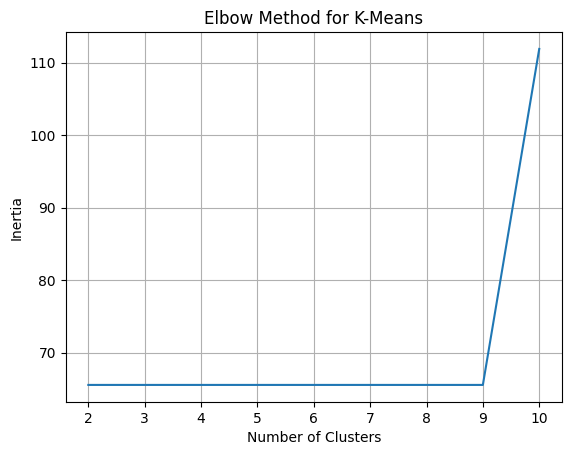

In [9]:
plt.title('Elbow Method for K-Means')
plt.plot(range(2,11),wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [10]:
df['Kmean_Cluster']=km.predict(df_scale)

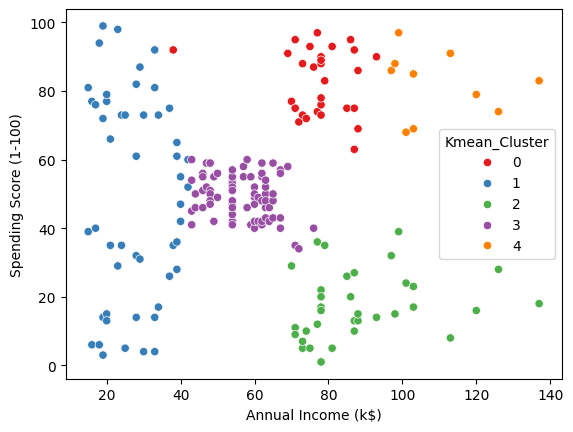

In [11]:
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',hue='Kmean_Cluster',palette='Set1')
plt.show()

blue   cluster= low income and low spending
red    cluster= high income and high spending
orange cluster= high income and low spending
purple cluster= low income and high spending
green  cluster= median income and median spending


In [12]:
df[(df['Kmean_Cluster'] == 0) | (df['Kmean_Cluster'] == 4)]

,Annual Income (k$),Spending Score (1-100),Kmean_Cluster
41,38,92,0
123,69,91,0
125,70,77,0
127,71,95,0
129,71,75,0
131,71,75,0
133,72,71,0
135,73,88,0
137,73,73,0
139,74,72,0


In [13]:
from scipy.cluster.hierarchy import dendrogram , linkage

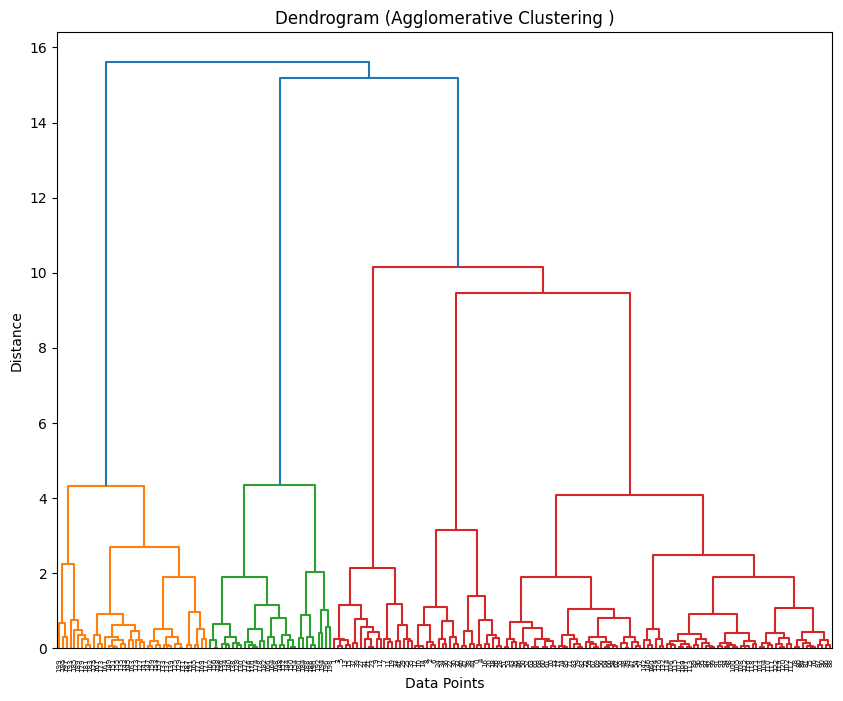

In [14]:
plt.figure(figsize=(10,8))
linked=linkage(df_scale,method='ward')
dendrogram(linked)
plt.title('Dendrogram (Agglomerative Clustering )')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [15]:
from sklearn.cluster import AgglomerativeClustering

In [16]:
ac=AgglomerativeClustering(n_clusters=5)
df['Agglomerative Cluster']=ac.fit_predict(df_scale)

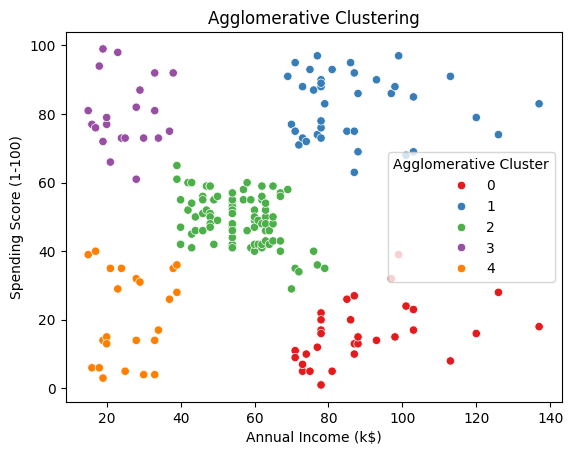

In [17]:
plt.title('Agglomerative Clustering')
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Agglomerative Cluster', palette='Set1')
plt.show()

In [18]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [19]:
ne=NearestNeighbors(n_neighbors=4)
ne_fit=ne.fit(df_scale)
distances, indices = ne_fit.kneighbors(df_scale)

In [20]:
distances = np.sort(distances[:, 3])

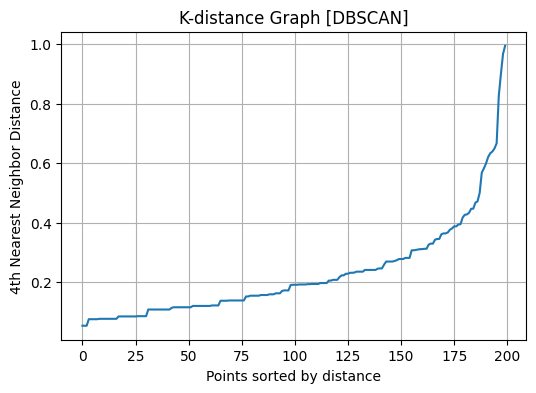

In [21]:
plt.figure(figsize=(6, 4))
plt.plot(distances)
plt.title('K-distance Graph [DBSCAN]')
plt.xlabel('Points sorted by distance')
plt.ylabel('4th Nearest Neighbor Distance')
plt.grid(True)
plt.show()

In [22]:
dbscan=DBSCAN(eps=0.4)

In [23]:
df['DBSCAN Cluster']=dbscan.fit_predict(df_scale)

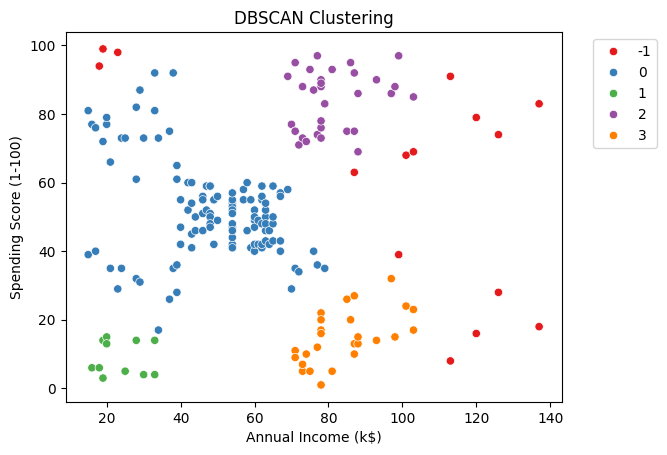

In [24]:
plt.title('DBSCAN Clustering')
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='DBSCAN Cluster', palette='Set1')
plt.legend(bbox_to_anchor=(1.05,1))
plt.show()

Feature               K-Means        Heirarchical
Need to choose k      Yes             Yes
Shape of clusters     Round-ish       Tree-like
Can detect noise      NO              No
Scaling               Yes             Yes
Graph that helped     Elbow method    Dendrogam